In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('Housing.csv')
df.shape

(545, 13)

In [22]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
5,10850000,7500,3,3,1,2,True,False,True,False,True,True,True,False
6,10150000,8580,4,3,4,2,True,False,False,False,True,True,True,False
7,10150000,16200,5,3,2,0,True,False,False,False,False,False,False,True
8,9870000,8100,4,1,2,2,True,True,True,False,True,True,False,False
9,9800000,5750,3,2,4,1,True,True,False,False,True,True,False,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
df.dropna(inplace=True) # It will remove complete row / record if there is null

In [9]:
df = pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],drop_first=True)

In [10]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [11]:
x_col = df.columns[1:]
print(x_col)

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [12]:
x = df[x_col]
y = df['price']

# x = df.drop['price], axis=1
# y = df['price']

In [13]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_yes                     545 non-null    bool 
 7   guestroom_yes                    545 non-null    bool 
 8   basement_yes                     545 non-null    bool 
 9   hotwaterheating_yes              545 non-null    bool 
 10  airconditioning_yes              545 non-null    bool 
 11  prefarea_yes                     545 non-null    bool 
 12  furnishingstatus_semi-furnished  545 non-null    b

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
y_pred = model.predict(x_test)

In [18]:
print(y_test," ->", y_pred)

443    3220000
128    5873000
79     6650000
348    3815000
335    3920000
        ...   
197    4956000
365    3703000
323    4025000
483    2940000
39     7910000
Name: price, Length: 109, dtype: int64  -> [2600913.00441753 5866223.75827579 6725227.41542285 3717472.68931084
 4808365.34049212 4105694.45738658 7297748.7069947  6545670.05841419
 8112107.11379691 7365603.80442089 5426428.27707251 4682293.88695731
 1918622.50082835 7958982.63263089 3893396.46959708 3149966.24360029
 4678377.22280409 3065451.82482312 4043092.43714357 5272353.7502257
 5193986.49293497 3392389.88167453 5375473.058998   6104440.02218375
 5548677.60924481 5910217.67656237 3014098.28247728 5474447.74081127
 4009128.69874194 2950104.95885304 3412910.41012926 4982774.24243496
 3315557.50851999 5250759.1794733  3906041.27418346 8342015.1294566
 4559387.84857    4201076.02477207 2613855.1492064  5500038.72558571
 3876897.05888487 5652561.53092721 7010418.92272019 2949943.43739075
 7573217.09816732 2607497.20224958 

In [19]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred) # difference between actual values and predicted values
r2 = r2_score(y_test,y_pred)  # score between actual and predicted (accuracy)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score (Accuracy): {r2:.2f}")
print(f"Model Accuracy: {r2*100:.2f} %")

Mean Squared Error: 1023704618902.09
R2 Score (Accuracy): 0.70
Model Accuracy: 69.88 %


In [20]:
print(x_test[x_col].shape)
print(y_test.shape)

(109, 13)
(109,)


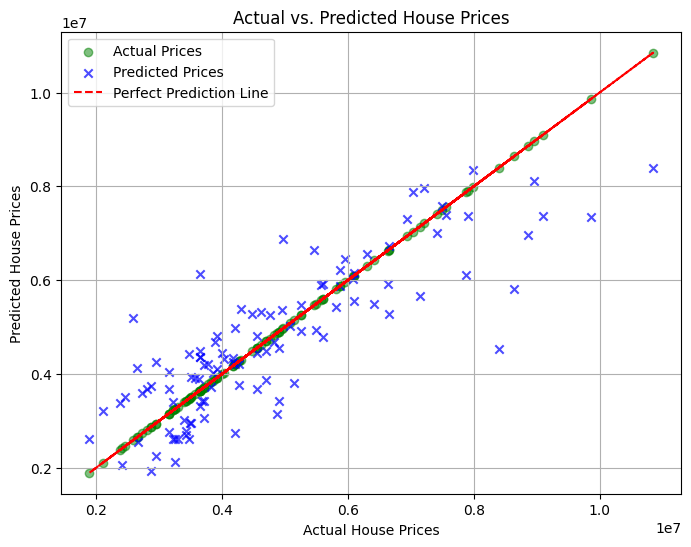

In [21]:
plt.figure(figsize=(8, 6))

# Scatterplot of actual house prices
plt.scatter(y_test, y_test, color='green', alpha=0.5, label='Actual Prices', marker='o')

# Scatterplot of predicted house prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted Prices', marker='x')

# Plot a 45-degree line to represent perfect predictions where predicted equals actual
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)

# Add a legend to differentiate between actual and predicted prices
plt.legend()

# Display the plot
plt.show()
